In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_table('flight_edges.tsv', names=['Origin Airport', 'Destination Airport', 'Origin City', 'Destination City', 
                                                          'Passengers', 'Seats', 'Flights', 'Distance', 'Fly Date', 'Origin Population', 'Destination Population'])


In [3]:
df['Fly Date'] = df['Fly Date'].astype(str)
df['Year'], df['Month'] = df['Fly Date'].str[:4], df['Fly Date'].str[4:]
df.head()

,Origin Airport,Destination Airport,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Year,Month
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219,2008,10
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034,1990,11
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034,1990,12
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034,1990,10
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034,1990,02


In [4]:
# Code to retrieve the year of interest into separate data frames. 

_2004_df = df[df["Year"] == "2004"].copy()
_2005_df = df[df["Year"] == "2005"].copy()
_2006_df = df[df["Year"] == "2006"].copy()
_2007_df = df[df["Year"] == "2007"].copy()
_2008_df = df[df["Year"] == "2008"].copy()
_2009_df = df[df["Year"] == "2009"].copy()


In [5]:
# Defined the seasons based on the month of the flight

def season(row): 
    if row["Month"] =="12" or row["Month"] == "01" or row["Month"] == "02":
        return "Winter"
    elif row["Month"] =="03" or row["Month"] == "04" or row["Month"] == "05":
        return "Spring"
    elif row["Month"] =="06" or row["Month"] == "07" or row["Month"] == "08":
        return "Summer"
    else:
         return "Fall"
    
# Add a season's column to each data frame
    
_2004_df["Season"] = _2004_df.apply(season, axis =1)
_2005_df["Season"] = _2005_df.apply(season, axis =1)
_2006_df["Season"] = _2006_df.apply(season, axis =1)
_2007_df["Season"] = _2007_df.apply(season, axis =1)
_2008_df["Season"] = _2008_df.apply(season, axis =1)
_2009_df["Season"] = _2009_df.apply(season, axis =1)


In [6]:
# Calculated the number of passengers based on season and per year

_2004_passengers = _2004_df[["Season", "Passengers"]].groupby("Season").sum()
_2005_passengers = _2005_df[["Season", "Passengers"]].groupby("Season").sum()
_2006_passengers = _2006_df[["Season", "Passengers"]].groupby("Season").sum()
_2007_passengers = _2007_df[["Season", "Passengers"]].groupby("Season").sum()
_2008_passengers = _2008_df[["Season", "Passengers"]].groupby("Season").sum()
_2009_passengers = _2009_df[["Season", "Passengers"]].groupby("Season").sum()





C:\Users\ahoff\AppData\Local\Temp\ipykernel_50324\29577207.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


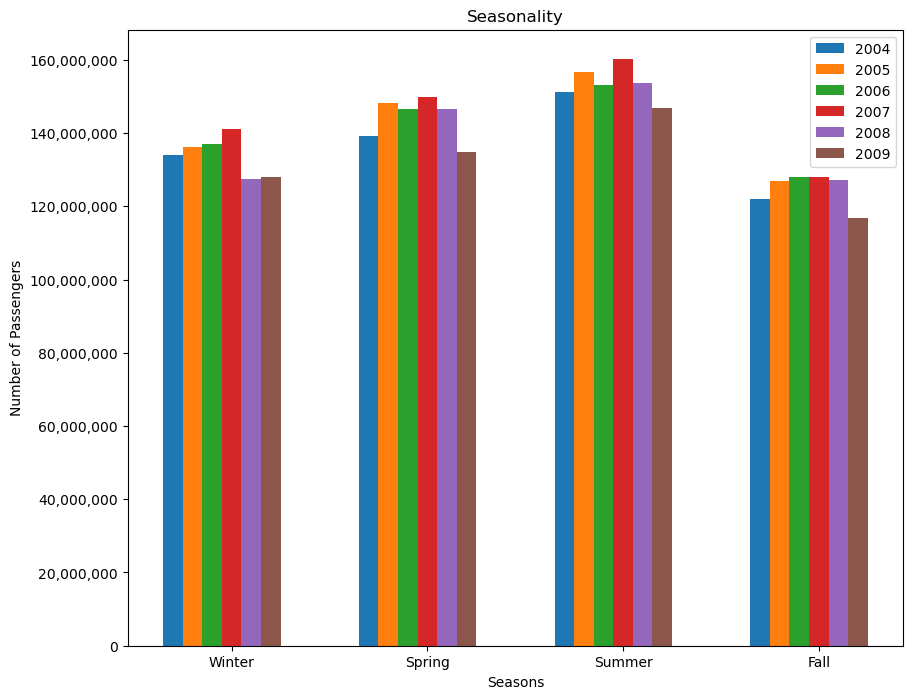

In [27]:
# Plot the data to show the number of passengers per season, per year. 

x = np.arange(4)
width = 0.1

plt.figure(figsize=(10, 8))
plt.bar(x-0.3, _2004_passengers["Passengers"], width)
plt.bar(x-0.2, _2005_passengers["Passengers"], width)
plt.bar(x-0.1, _2006_passengers["Passengers"], width)
plt.bar(x, _2007_passengers["Passengers"], width)
plt.bar(x+0.1, _2008_passengers["Passengers"], width)
plt.bar(x+0.2, _2009_passengers["Passengers"], width)
plt.xticks(x, ["Winter", "Spring", "Summer", "Fall"])
plt.xlabel("Seasons")
plt.ylabel("Number of Passengers")
plt.legend(["2004", "2005", "2006", "2007", "2008", "2009"], loc='upper right')
plt.title("Seasonality")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()